In [12]:
import os
import pandas as pd
import numpy as np
from astropy import units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import integrate
from astropy.cosmology import Planck13


#Table = pd.read_csv('/Users/87steven/Downloads/J1220+0203 SDSS spectrum.csv')
#z = 0.24

source_name = 'J0024-0412'
Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum/' + source_name + '.csv')
z = 2.098

wavelength = Table['Wavelength'].values
flux = Table['Flux'].values
bestfit = Table['BestFit'].values
skyflux = Table['SkyFlux'].values




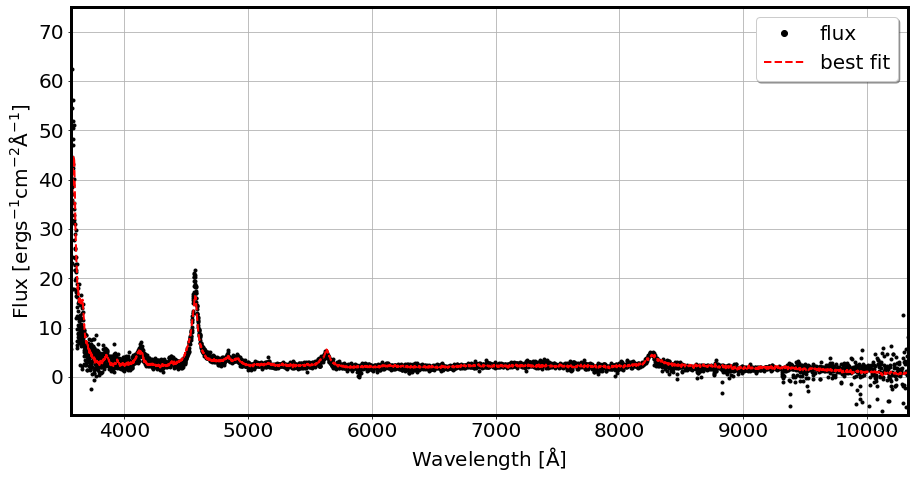

In [13]:
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

ax.plot(wavelength, flux, '.', c = 'black', markersize = 6, label = 'flux')
ax.plot(wavelength, bestfit, '--', c = 'red', linewidth = 2, label = 'best fit')
#ax.plot(wavelength, skyflux, '.', c = 'blue', markersize = 6, label = 'sky flux')

ax.set_xlim (min(wavelength), max(wavelength))
ax.set_ylim (min(flux)*0.8, max(flux)*1.2)
    
plt.xlabel( "Wavelength [$\mathrm{\AA}$]",  fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Flux [$\mathrm{erg s^{-1} cm^{-2} \AA^{-1}}$]',  fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.legend(loc = 'upper right', shadow=True, bbox_to_anchor = (1., 1), fontsize = 20, markerscale = 2) 



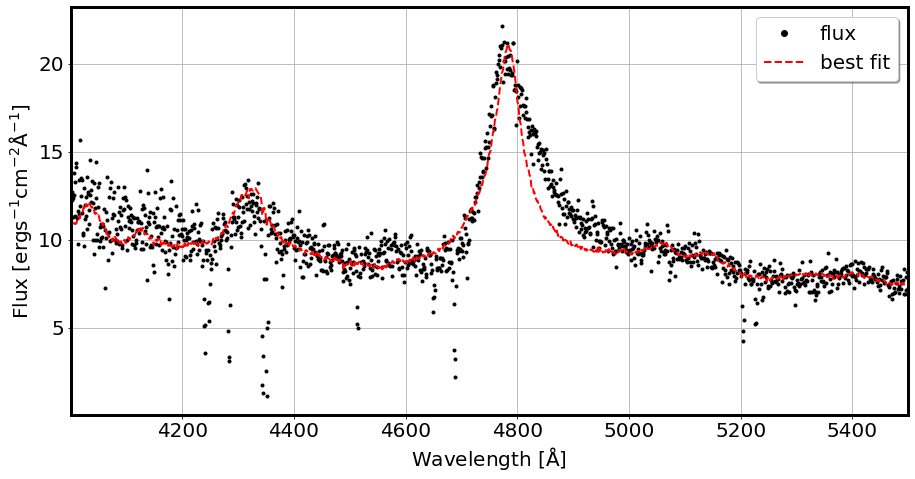

In [14]:
obs_interval_low = 4000
obs_interval_up = 5500

index = np.where( (obs_interval_low < wavelength) & (wavelength < obs_interval_up))[0]

mean_flux = np.mean(flux[index])

plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

ax.plot(wavelength[index], flux[index], '.', c = 'black', markersize = 6, label = 'flux')
ax.plot(wavelength[index], bestfit[index], '--', c = 'red', linewidth = 2, label = 'best fit')

ax.set_xlim (min(wavelength[index]), max(wavelength[index]))
#ax.set_ylim (min(flux[index])*0.8, max(flux[index])*1.2)
    
plt.xlabel( "Wavelength [$\mathrm{\AA}$]",  fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Flux [$\mathrm{erg s^{-1} cm^{-2} \AA^{-1}}$]',  fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1., 1), fontsize = 20, markerscale = 2) 


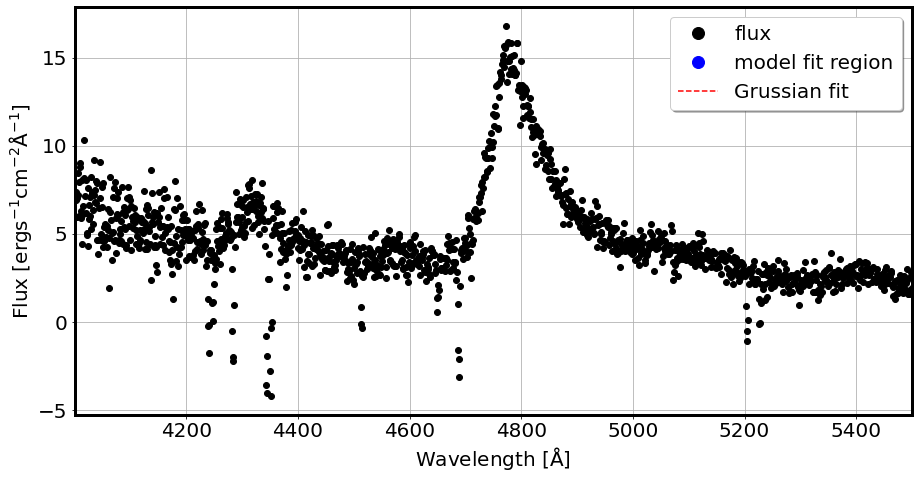

In [15]:
#######################################################################################################
### define Gaussian model fit
#######################################################################################################
def gauss(x, mu, sigma, A):
    return A*np.exp( -(x-mu)**2/2/sigma**2 )

### gaussian integral for equivalent width
def gaussian_integral(x, A, mu, sigma): 
    return A*np.exp( -(x-mu)**2/2/sigma**2 )

fit_index = np.where( (wavelength < 6240) & (wavelength > 6180) )
wavelength_fit = wavelength[fit_index]
flux_fit = flux[fit_index]

expected = (6215, 50, 450)
params, cov = curve_fit(gauss, wavelength_fit, flux_fit-mean_flux+abs(min(flux_fit-mean_flux)), expected)
sigma = np.sqrt( np.diag(cov) )

x_fit = np.linspace(min(wavelength_fit), max(wavelength_fit), 1000)
y_fit = gauss(x_fit, *params)

#######################################################################################################
### plot Gaussian model fit
#######################################################################################################
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

ax.plot(wavelength[index], flux[index]-mean_flux+abs(min(flux_fit-mean_flux)), 'o', c = 'black', markersize = 6, label = 'flux')
ax.plot(wavelength_fit, flux_fit-mean_flux+abs(min(flux_fit-mean_flux)), 'o', c = 'blue', markersize = 6, label = 'model fit region')
ax.plot(x_fit, y_fit, '--', c = 'red', markersize = 6, label = 'Grussian fit')


ax.set_xlim (min(wavelength[index]), max(wavelength[index]))
#ax.set_ylim (min(flux[index])*0.8, max(flux[index])*1.2)
    
plt.xlabel( "Wavelength [$\mathrm{\AA}$]",  fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Flux [$\mathrm{erg s^{-1} cm^{-2} \AA^{-1}}$]',  fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1., 1), fontsize = 20, markerscale = 2) 


ValueError: zero-size array to reduction operation minimum which has no identity

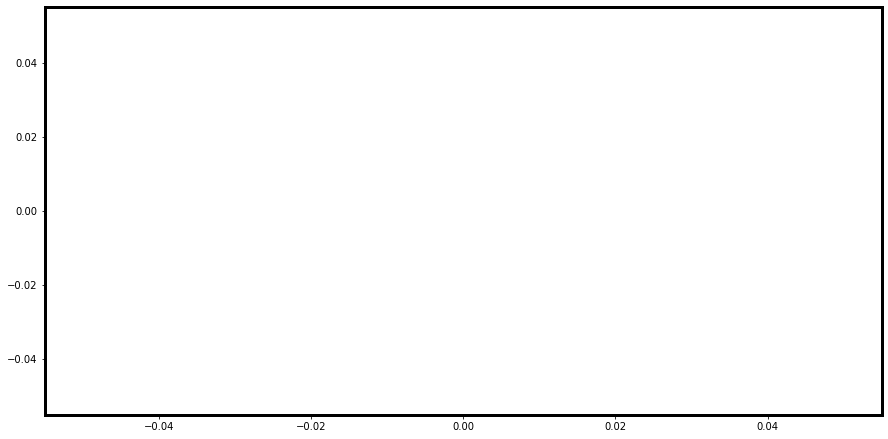

In [16]:
#######################################################################################################
### define plotting regime
#######################################################################################################
obs_interval_up = 5100*(1+z)
obs_interval_low = 4950*(1+z)

index = np.where( (wavelength < obs_interval_up) & (wavelength > obs_interval_low))[0]

plot_wavelength = wavelength[index]
plot_flux = flux[index]

#######################################################################################################
### fit power law
#######################################################################################################
fit_powerlaw_index = np.where( (6250 < wavelength) & (wavelength < 6300) )

wavelength_powerlaw = wavelength[fit_powerlaw_index]
flux_powerlaw = flux[fit_powerlaw_index]

def func(y, a, C):
    return C+y*(a)
    
popt, pcov = curve_fit(func, np.log10(wavelength_powerlaw), np.log10(flux_powerlaw))
yfit_powerlaw = func(np.log10(plot_wavelength ), *popt)

#######################################################################################################
### plot power law fit
#######################################################################################################
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

ax.plot(plot_wavelength, plot_flux, 'o', c = 'black', markersize = 6, label = 'flux')
ax.plot(plot_wavelength, 10**yfit_powerlaw, '--', c = 'red', linewidth = 3, label = 'Power Law model fit')

ax.set_xlim( np.min(plot_wavelength), np.max(plot_wavelength) )
    
plt.xlabel("Wavelength [$\mathrm{\AA}$]",  fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Flux [$\mathrm{erg s^{-1} cm^{-2} \AA^{-1}}$]',  fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1., 1), fontsize = 20, markerscale = 2) 

#######################################################################################################
### plot flux subtract power law fit
#######################################################################################################
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

ax.plot(plot_wavelength, plot_flux-10**yfit_powerlaw, 'o', c = 'black', markersize = 6, label = 'flux')

ax.set_xlim( np.min(plot_wavelength), np.max(plot_wavelength) )
            
plt.xlabel("Wavelength [$\mathrm{\AA}$]",  fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Flux [$\mathrm{erg s^{-1} cm^{-2} \AA^{-1}}$]',  fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1., 1), fontsize = 20, markerscale = 2) 

#######################################################################################################
### Gaussian model fit
#######################################################################################################
def gauss(x, mu, sigma, A):
    Gauss_model = A*np.exp( -(x-mu)**2/2/sigma**2 )
    return Gauss_model

### gaussian integral for equivalent width
def gaussian_integral(x, mu, sigma, A): 
    EW = A*np.exp( -(x-mu)**2/2/sigma**2 )
    return EW

fit_index = np.where( (6180 < plot_wavelength) & (plot_wavelength < 6240) )
wavelength_fit = plot_wavelength[fit_index]
flux_fit = (plot_flux-10**yfit_powerlaw)[fit_index]

expected = (6215, 50, 450)
params, cov = curve_fit(gauss, wavelength_fit, flux_fit, expected)
sigma = np.sqrt( np.diag(cov) )

x_fit = np.linspace(min(wavelength_fit), max(wavelength_fit), 100)
y_fit = gauss(x_fit, *params)

EW = integrate.simpson(gaussian_integral(x_fit, params[0], params[1], params[2]), x_fit)

### plot Gaussian model fit
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

ax.plot(plot_wavelength, plot_flux-10**yfit_powerlaw, 'o', c = 'black', markersize = 6, label = 'Power law subtracted flux')
ax.plot(x_fit, y_fit, '--', c = 'blue', linewidth = 3, label = 'Gaussian model fit')

ax.set_xlim( min(plot_wavelength), max(plot_wavelength) )
    
plt.xlabel( "Wavelength [$\mathrm{\AA}$]",  fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Flux [$\mathrm{erg s^{-1} cm^{-2} \AA^{-1}}$]',  fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1., 1), fontsize = 20, markerscale = 2) 

print('Gaussain Model fit result: Mean = %4.2f, Sigma = %4.2f, Amplitude = %4.2f' %(params[0], params[1], params[2]))
print('EW = %4.2f' %(EW))
